# **Лабораторна робота №3**
### з дисципліни **"Інтелектуальний аналіз даних"**

##### **За темою:** "Класифiкацiя та регресія на основі багатошарового персептрона в Scikit-Learn Python"

##### **Варіант:** 24

##### **Виконав:** Гавлицький Іван, КА-12

##### **Перевірила:** Недашкiвська Н.I.

**Мета:** здобути навички вибору та навчання базових нейронних мереж для вирішення задач класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### **Завдання:**
Побудувати моделi класифiкацiї на основi *multi-layer perceptron*, використовуючи ***sklearn.neural_network.MLPClassifier¶***.


##### **Хід виконання роботи:**
1. Представити початковi данi графiчно.
2. Розбити данi на навчальний та валiдацiйний набори.
3. Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.
4. Представити моделi графiчно.
5. Виконати прогнози на основi побудованих моделей.
6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.
7. Розрахувати додатковi результати моделей.
8. Побудувати границi рiшень графiчно для кожної
з моделей.
9. Розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:
  * матрицю неточностей (*confusion matrix*),
  * точнiсть (*precision*),
  * повноту (*recall*),
  * мiру F1 (*F1 score*),
  * побудувати криву точностi-повноти (*precision-recall (PR) curve*), ROC-криву, показник AUC.

10. Спробувати виконати решiтчастий пошук (*grid search*) для пiдбору гiперпараметрiв моделей.
11. Зробити висновки про якiсть роботи моделей на дослiджених даних. На
основi критерiїв якостi спробувати обрати найкращу модель.
12. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки
розмiр навчальної множини впливає на якiсть моделi.

##### **Датасет 1:**

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs (n_samples=400, centers=4, cluster_std=0.60 , random_state=0)

rng = np.random.RandomState(13)
X = np.dot(X, rng.randn(2, 2))

Представимо дані графічно.

,feature_1,feature_2,target
0,-0.466891,3.119969,3.0
1,1.809786,-0.894205,2.0
2,1.929417,-0.799470,2.0
3,-0.692774,2.479103,0.0
4,1.700245,-0.833930,2.0


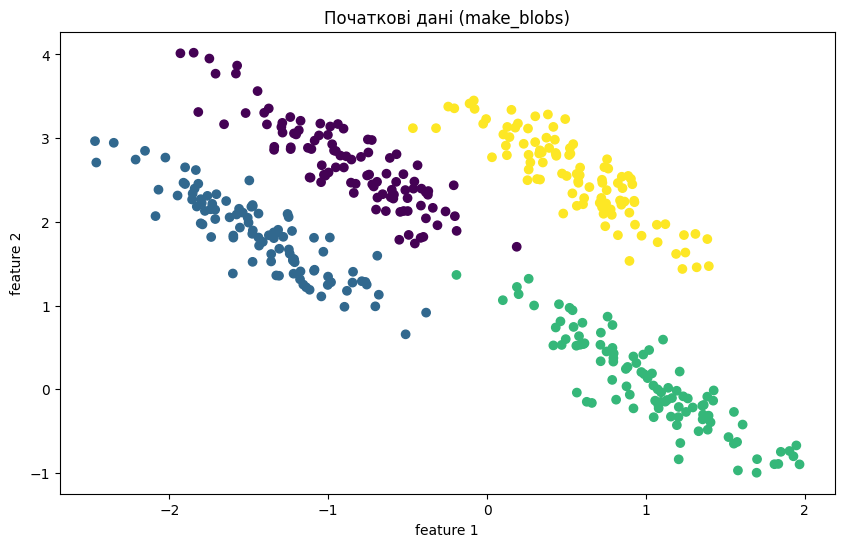

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Початкові дані (make_blobs)')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

ax.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
fig.show()


df = pd.DataFrame(data=np.concatenate((X, y_true.reshape(400,1)), axis=-1), columns=['feature_1', 'feature_2', 'target'])
df.head()

Розіб'ємо данні на навчальний та валідаційний набори.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.25, random_state=42)

Побудуємо персептрон із одним скритим шаром та стандартною кількістю нейронів в ньому $(100)$.

In [5]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=1000, random_state=42)

model.fit(X_train, y_train);

Виконаємо прогнози та побудуємо навчальну криву для оцінки факту перенавчання.

In [6]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [7]:
from sklearn.model_selection import learning_curve

def learning_curve_plot(X, y_true, model):
    train_sizes, train_scores, test_scores = learning_curve(model,
                                                            X,
                                                            y_true, 
                                                            train_sizes=np.linspace(0.1, 1.0, 10), 
                                                            cv=10, 
                                                            shuffle=True, 
                                                            random_state=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.set_title('Learning curve')
    ax.set_xlabel('Test sample size')
    ax.set_ylabel('Score')

    ax.plot(train_sizes, train_scores_mean, 'o-', label='Train score')
    ax.fill_between(train_sizes,
                    train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std,
                    alpha=0.1)

    ax.plot(train_sizes, test_scores_mean, 'o-', label='Test score')
    ax.fill_between(train_sizes,
                    test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std,
                    alpha=0.1)

    ax.legend()
    fig.show()

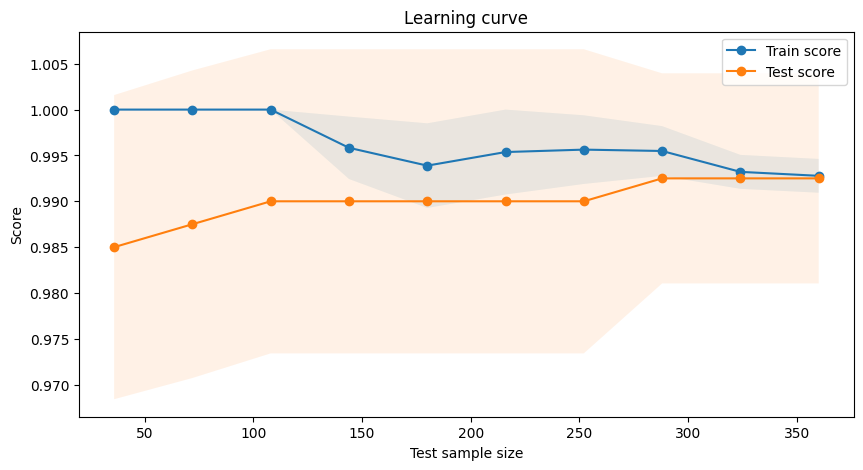

In [8]:
learning_curve_plot(X, y_true, model)

Спираючись на додаткові [джерела](https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5):
> **Typical features of the learning curve of a good fit model**
> 1. Training loss and Validation loss are close to each other with validation loss being slightly greater than the training loss.
> 2. Initially decreasing training and validation loss and a pretty flat training and validation loss after some point till the end.

можемо зробити висновок про відсутність фактів перенавчання та недонавчання.


Графічно представимо границі рішень.

/opt/conda/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


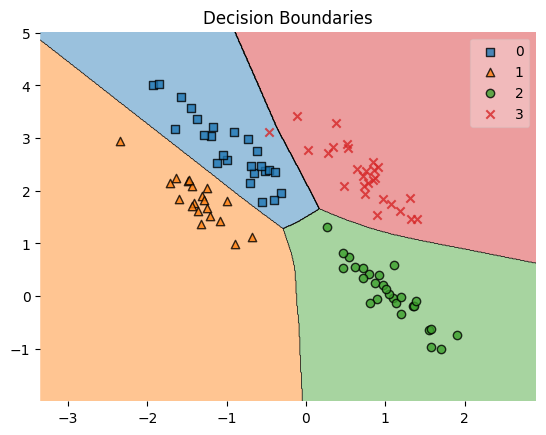

In [9]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, clf=model)

plt.title('Decision Boundaries')
plt.show()

Побудуємо *confusion matrix* для навчального та валідаційного наборів.

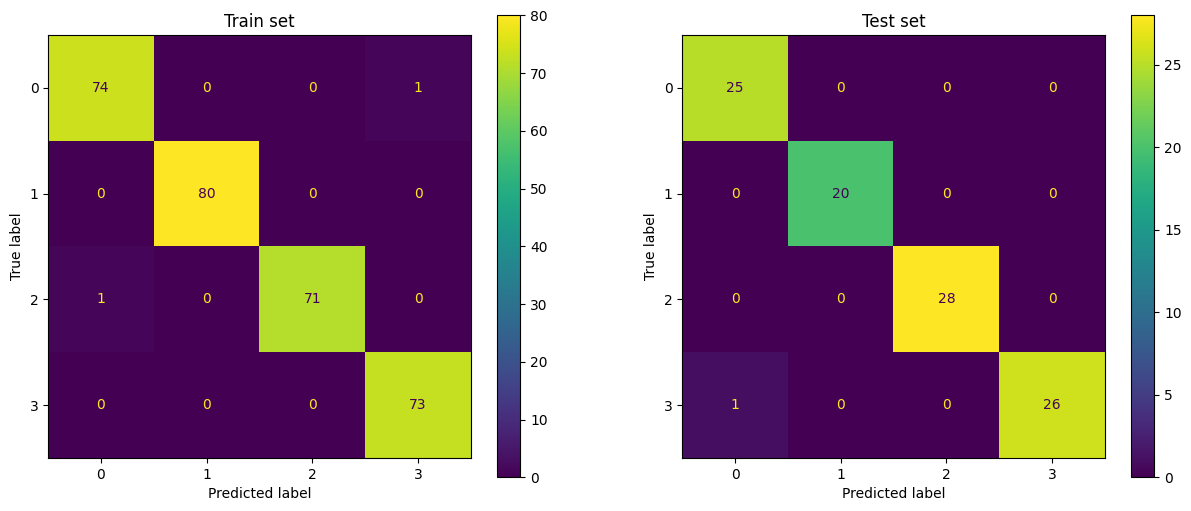

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

cmd.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title('Train set')

cmd.from_predictions(y_test, y_test_pred, ax=axs[1])
axs[1].set_title('Test set')

fig.show()

Також обчислимо *precision*, *recall* та *F1-score*.

In [11]:
from sklearn.metrics import classification_report

print('Train set:')
report = classification_report(y_train, y_train_pred, target_names=['class_0', 'class_1', 'class_2', 'class_3'])
print(report, end='\n'*5)

print('Test set')
report = classification_report(y_test, y_test_pred, target_names=['class_0', 'class_1', 'class_2', 'class_3'])
print(report)

Train set:
              precision    recall  f1-score   support

     class_0       0.99      0.99      0.99        75
     class_1       1.00      1.00      1.00        80
     class_2       1.00      0.99      0.99        72
     class_3       0.99      1.00      0.99        73

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300





Test set
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        25
     class_1       1.00      1.00      1.00        20
     class_2       1.00      1.00      1.00        28
     class_3       1.00      0.96      0.98        27

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



Побудуємо *precision-recall* криві.

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Y_true = label_binarize(y_true, classes=[0, 1, 2, 3])
x_train, x_test, Y_train, Y_test = train_test_split(X, Y_true, test_size=0.25, random_state=42)

binary_model = OneVsRestClassifier(MLPClassifier(max_iter=1000, random_state=42))

binary_model.fit(x_train, Y_train)

Y_train_pred = binary_model.predict(X_train)
Y_test_pred = binary_model.predict(X_test)

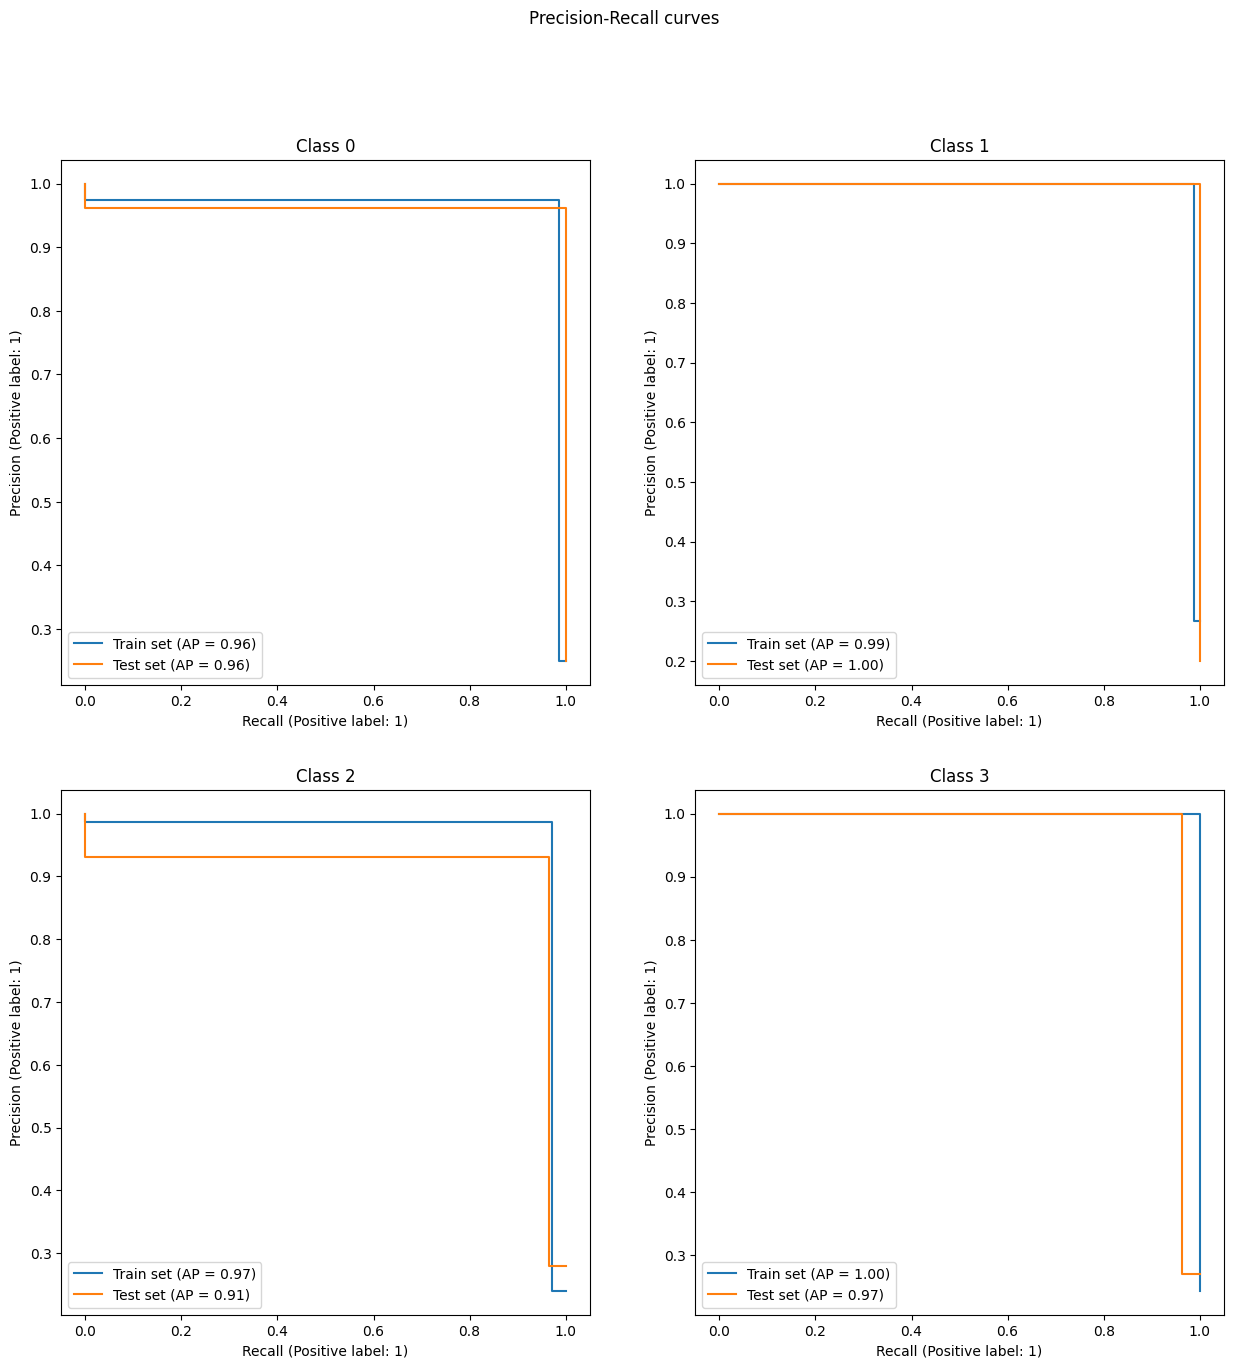

In [13]:
from sklearn.metrics import PrecisionRecallDisplay

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.flatten()

for ii in range(4):
    PrecisionRecallDisplay.from_predictions(Y_train[:, ii], 
                                            Y_train_pred[:, ii],
                                            ax=axs[ii], 
                                            name='Train set')
    
    PrecisionRecallDisplay.from_predictions(Y_test[:, ii], 
                                            Y_test_pred[:, ii],
                                            ax=axs[ii], 
                                            name='Test set')
    
    axs[ii].set_title(f'Class {ii}')
    
fig.suptitle('Precision-Recall curves')
fig.show()

Побудуємо *ROC* криві.

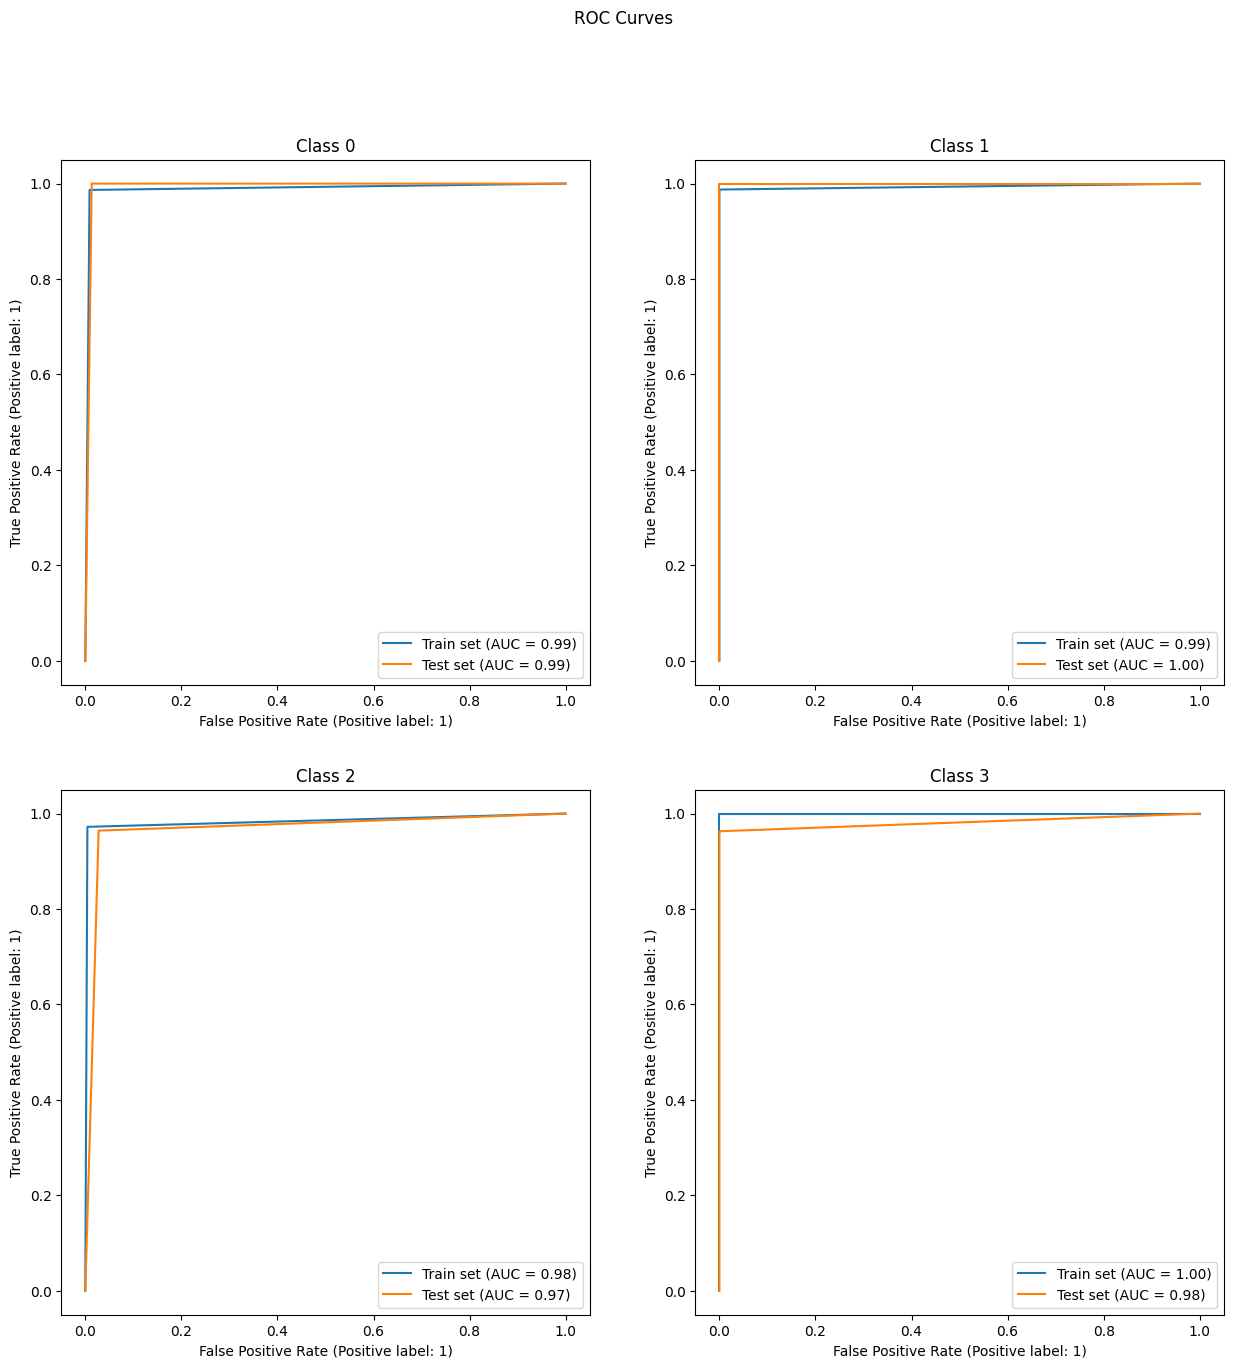

In [14]:
from sklearn.metrics import RocCurveDisplay

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.flatten()

for ii in range(4):
    RocCurveDisplay.from_predictions(Y_train[:, ii], 
                                     Y_train_pred[:, ii],
                                     ax=axs[ii], 
                                     name='Train set')
    
    RocCurveDisplay.from_predictions(Y_test[:, ii], 
                                     Y_test_pred[:, ii],
                                     ax=axs[ii], 
                                     name='Test set')
    
    axs[ii].set_title(f'Class {ii}')
    
fig.suptitle('ROC Curves')
fig.show()

Побудуємо криву навчання залежно від кількості нейронів в скритому шарі.

In [15]:
from sklearn.model_selection import cross_validate

def learning_curve_neuron_count(X, y_true, neuron_counts, cv=10):
    train_scores = []
    test_scores = []
    
    for neuron_count in neuron_counts:
        model = MLPClassifier(
            hidden_layer_sizes=(neuron_count,),
            max_iter=10000,
            random_state=42
        )
        
        cv_results = cross_validate(model, X, y_true, cv=cv, return_train_score=True)
#         print(f"train_score: {cv_results['train_score']}")
#         print(f"test_score: {cv_results['test_score']}")

        train_scores.append(cv_results['train_score'])
        test_scores.append(cv_results['test_score'])
        
    return neuron_counts, np.array(train_scores), np.array(test_scores)

    

In [16]:
def learning_curve_neuron_count_plot(X, y_true, neuron_counts):
    train_sizes, train_scores, test_scores = learning_curve_neuron_count(
        X,
        y_true, 
        neuron_counts=neuron_counts,
        cv=10
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.set_title('Learning curve')
    ax.set_xlabel('Neurons count')
    ax.set_ylabel('Score')

    ax.plot(train_sizes, train_scores_mean, 'o-', label='Train score')
    ax.fill_between(train_sizes,
                    train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std,
                    alpha=0.1)

    ax.plot(train_sizes, test_scores_mean, 'o-', label='Test score')
    ax.fill_between(train_sizes,
                    test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std,
                    alpha=0.1)

    ax.legend()
    fig.show()

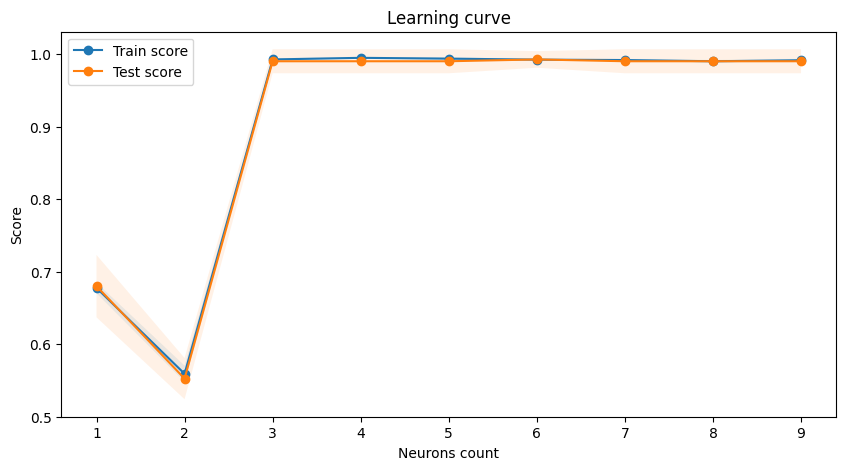

In [17]:
learning_curve_neuron_count_plot(X, y_true, neuron_counts=np.arange(1, 10))

##### **Висновки:**

Із кривої вище, можна зробити висновок, що одношарової моделі більше ніж достатньо для опису даних. 3 нейрони скритого шару необхідно для задовільного розв'язання задачі, наступне збільшення кількості не дає значного приросту точності моделі.

##### **Датасет 2:**

In [18]:
np.random.seed(0)
X = np.random.randn(300, 2)
y_true = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

Представимо дані графічно.

,feature_1,feature_2,target
0,1.764052,0.400157,0.0
1,0.978738,2.240893,0.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


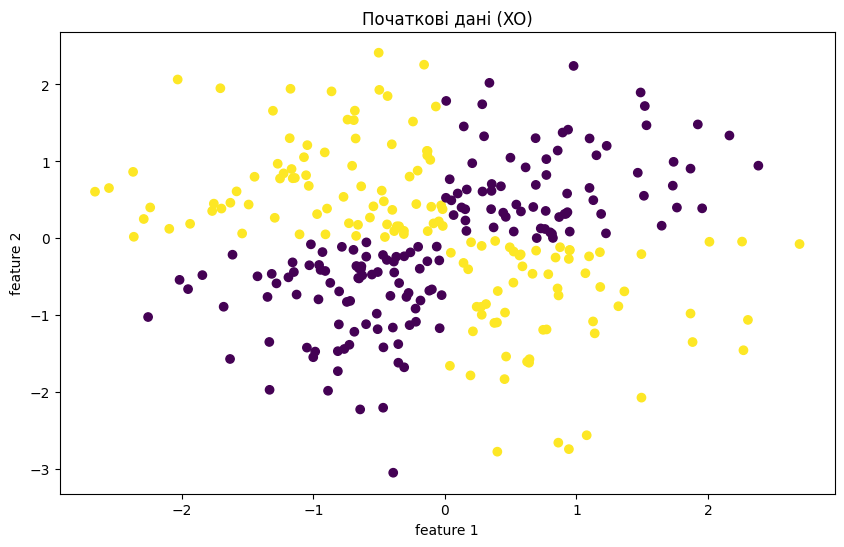

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Початкові дані (XO)')
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')

ax.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
fig.show()


df = pd.DataFrame(data=np.concatenate((X, y_true.reshape(300,1)), axis=-1), columns=['feature_1', 'feature_2', 'target'])
df.head()

Розіб'ємо данні на навчальний та валідаційний набори.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.25, random_state=42)

Побудуємо персептрон із одним скритим шаром та стандартною кількістю нейронів в ньому $(100)$.

In [21]:
model = MLPClassifier(max_iter=10000, random_state=42)

model.fit(X_train, y_train);

Виконаємо прогнози та побудуємо навчальну криву для оцінки факту перенавчання.

In [22]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

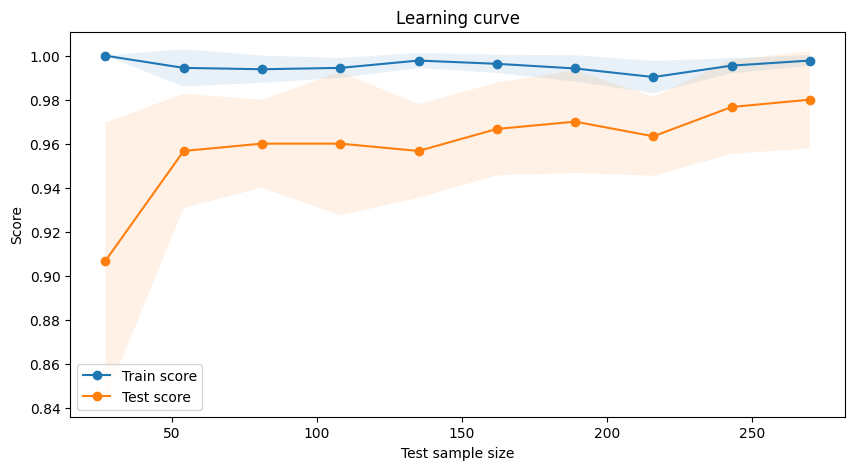

In [23]:
learning_curve_plot(X, y_true, model)

Перенавчання не спостерігаємо. Графічно представимо границі рішень.

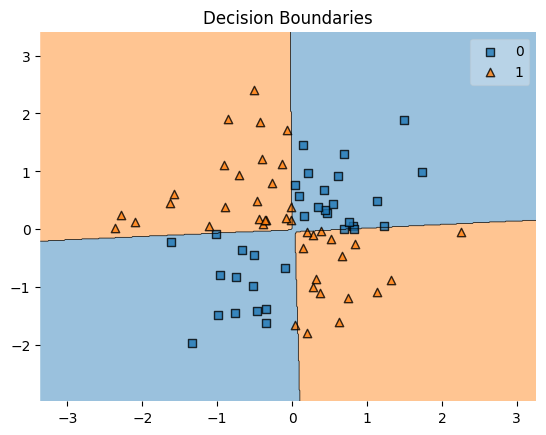

In [24]:
plot_decision_regions(X_test, y_test, clf=model)

plt.title('Decision Boundaries')
plt.show()

Побудуємо *confusion matrix* для навчального та валідаційного наборів.

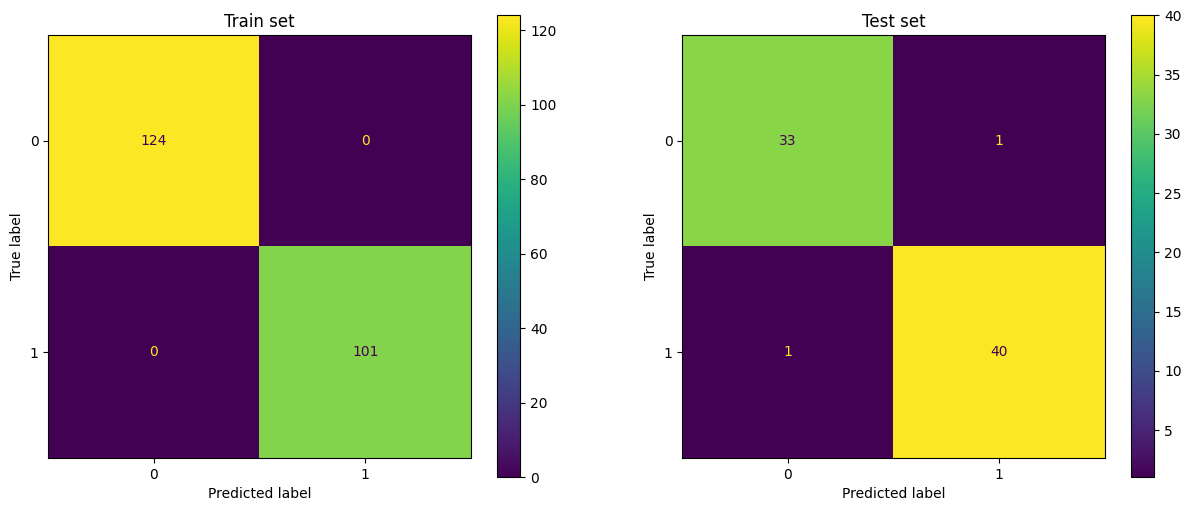

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

cmd.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title('Train set')

cmd.from_predictions(y_test, y_test_pred, ax=axs[1])
axs[1].set_title('Test set')

fig.show()

Також обчислимо *precision*, *recall* та *F1-score*.

In [26]:
print('Train set:')
report = classification_report(y_train, y_train_pred, target_names=['class_0', 'class_1'])
print(report, end='\n'*5)

print('Test set')
report = classification_report(y_test, y_test_pred, target_names=['class_0', 'class_1'])
print(report)

Train set:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       124
     class_1       1.00      1.00      1.00       101

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225





Test set
              precision    recall  f1-score   support

     class_0       0.97      0.97      0.97        34
     class_1       0.98      0.98      0.98        41

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



Побудуємо *precision-recall* криві.

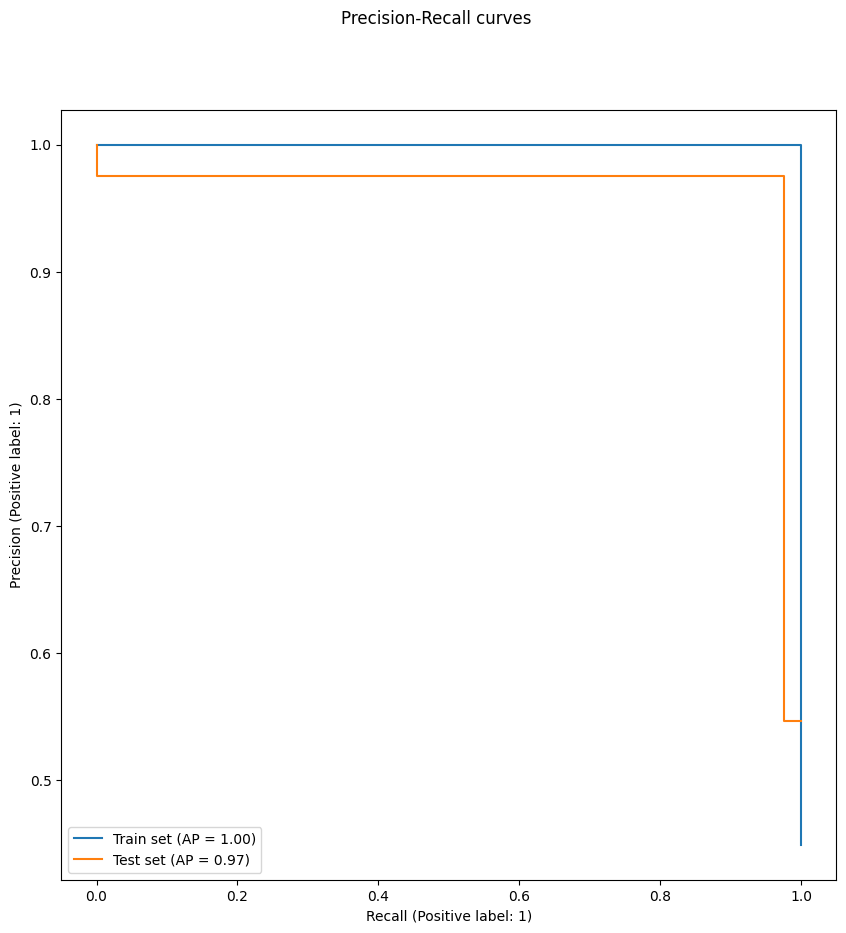

In [27]:
fig, axs = plt.subplots(figsize=(10, 10))

PrecisionRecallDisplay.from_predictions(y_train, 
                                        y_train_pred,
                                        ax=axs, 
                                        name='Train set')

PrecisionRecallDisplay.from_predictions(y_test, 
                                        y_test_pred,
                                        ax=axs, 
                                        name='Test set')
    
fig.suptitle('Precision-Recall curves')
fig.show()

Побудуємо *ROC* криві.

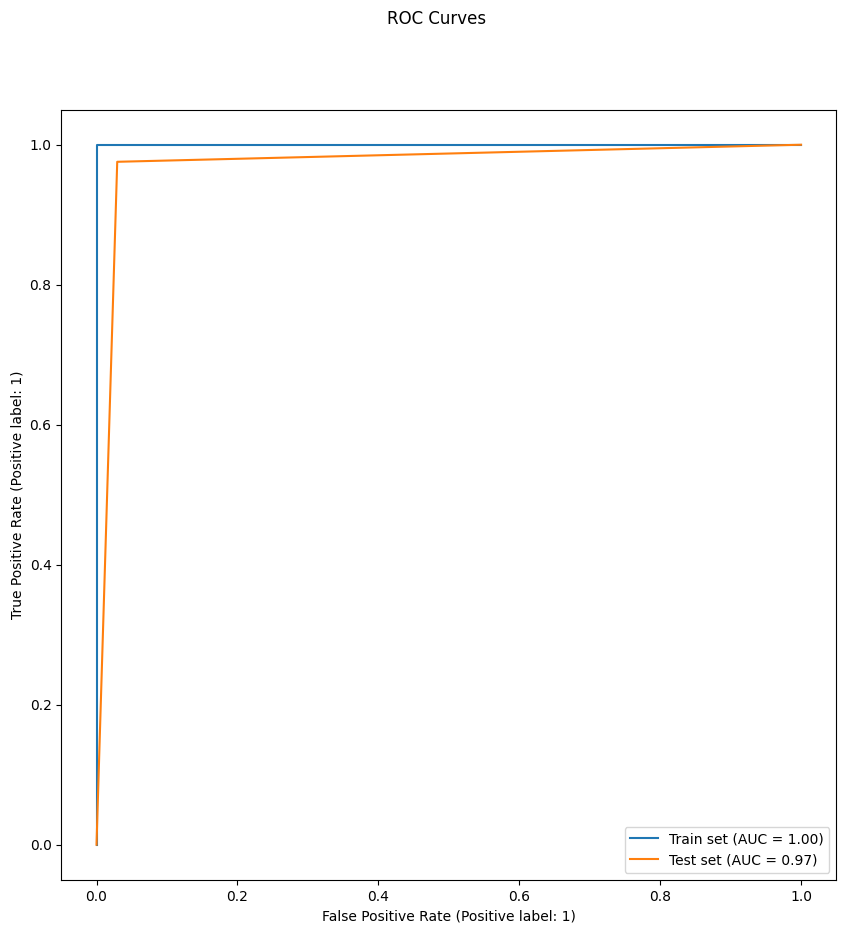

In [28]:
fig, axs = plt.subplots(figsize=(10, 10))

RocCurveDisplay.from_predictions(y_train, 
                                 y_train_pred,
                                 ax=axs, 
                                 name='Train set')

RocCurveDisplay.from_predictions(y_test, 
                                 y_test_pred,
                                 ax=axs, 
                                 name='Test set')
    
fig.suptitle('ROC Curves')
fig.show()

Побудуємо криву навчання залежно від кількості нейронів в скритому шарі.

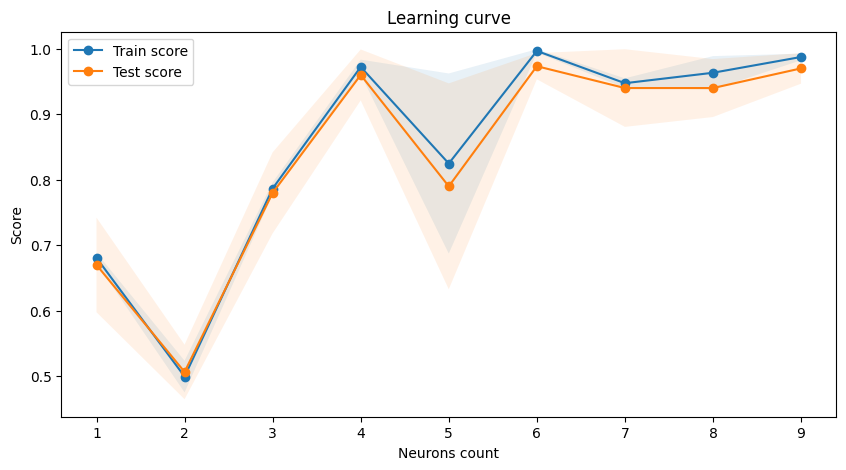

In [29]:
learning_curve_neuron_count_plot(X, y_true, neuron_counts=np.arange(1, 10))

Виконаємо решітчастий пошук для підбору гіперпараметрів моделі.

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(6,), (4, 2), (4, 3), (5, 3)]
}

grid_search = GridSearchCV(model, param_grid, cv=10, refit=True, scoring='accuracy')

grid_search.fit(X_train, y_train);

Одержали найкращі гіперпараметри:

In [31]:
print(f'Найкраща точність: {grid_search.best_score_}')
print(f'За наступних гіперпараметрів: {grid_search.best_params_}')

Найкраща точність: 0.9865612648221344
За наступних гіперпараметрів: {'hidden_layer_sizes': (6,)}


Перевіримо точність моделі на валідаційних даних.

In [32]:
best_model = grid_search.best_estimator_
print('Test accuracy: %.3f' % best_model.score(X_test, y_test))

Test accuracy: 0.960


##### **Висновки:**
Одношарової моделі більше ніж достатньо для опису даних. 6 нейронів скритого шару необхідно для задовільного розв'язання задачі, наступне збільшення кількості не дає значного приросту точності моделі, а додавання додаткового шару не несе великого сенсу.